In [ ]:
# dataset: https://finance.yahoo.com/quote/NVDA/history?p=NVDA

In [ ]:
import pandas as pd

df = pd.read_csv('NVDA.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-21,120.980003,124.980003,118.870003,124.660004,124.583801,60949400
1,2022-10-24,125.080002,127.099998,120.639999,125.989998,125.912987,51745700
2,2022-10-25,126.940002,133.000000,126.639999,132.610001,132.528931,50548200
3,2022-10-26,128.690002,133.880005,127.080002,128.960007,128.881180,53295300
4,2022-10-27,136.300003,138.380005,131.220001,131.759995,131.679459,58311300
...,...,...,...,...,...,...,...
246,2023-10-16,450.630005,462.250000,449.119995,460.950012,460.950012,37509900
247,2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
248,2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400
249,2023-10-19,428.109985,432.970001,418.820007,421.010010,421.010010,50123300


In [ ]:
# fetch only the Date and Close columns
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-10-21,124.660004
1,2022-10-24,125.989998
2,2022-10-25,132.610001
3,2022-10-26,128.960007
4,2022-10-27,131.759995
...,...,...
246,2023-10-16,460.950012
247,2023-10-17,439.380005
248,2023-10-18,421.959991
249,2023-10-19,421.010010


In [ ]:
# convert date object into datetime64

import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)

df

<ipython-input-4-eb9c9e8e881b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date,Close
0,2022-10-21,124.660004
1,2022-10-24,125.989998
2,2022-10-25,132.610001
3,2022-10-26,128.960007
4,2022-10-27,131.759995
...,...,...
246,2023-10-16,460.950012
247,2023-10-17,439.380005
248,2023-10-18,421.959991
249,2023-10-19,421.010010


In [ ]:
# set date as index
df.index = df.pop('Date')

df

,Close
Date,
2022-10-21,124.660004
2022-10-24,125.989998
2022-10-25,132.610001
2022-10-26,128.960007
2022-10-27,131.759995
...,...
2023-10-16,460.950012
2023-10-17,439.380005
2023-10-18,421.959991


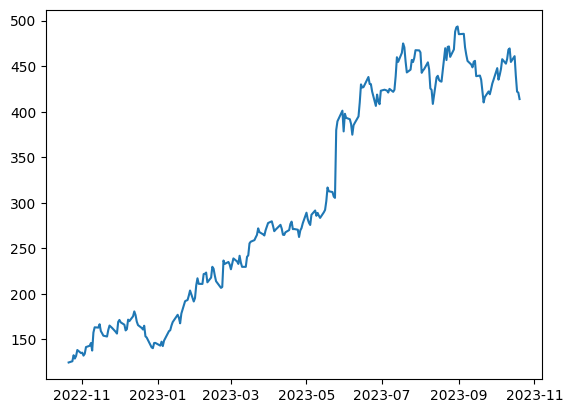

In [ ]:
import matplotlib.pyplot as plt

# plot date against actual historical closing price
plt.plot(df.index, df['Close'])

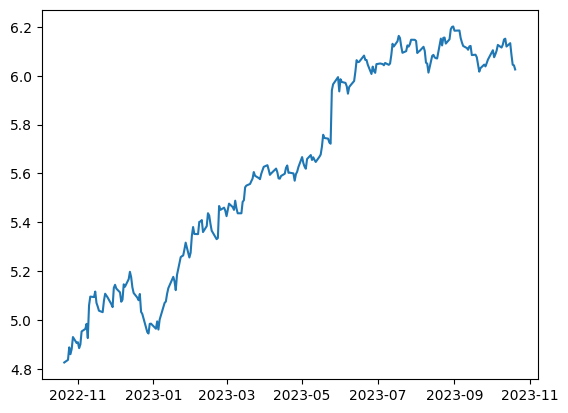

In [ ]:
import numpy as np

# transform the series to stabilise variance
df = np.log(df)

plt.plot(df)

In [ ]:
# generate training and testing sets
q_70 = int(len(df) * 0.7)

df_train = df[:q_70]
df_test = df[q_70:]

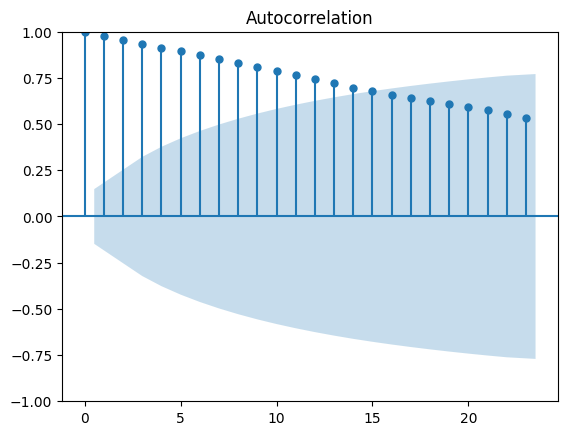

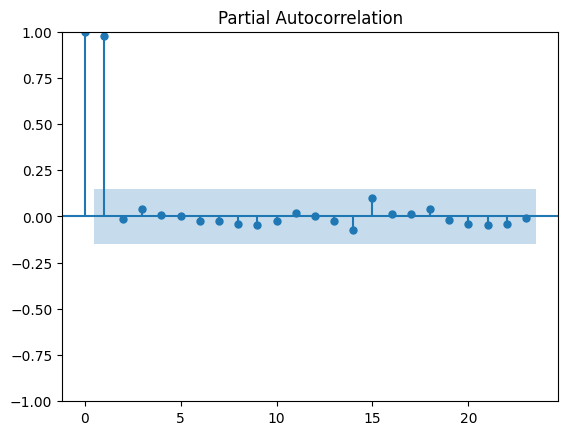

In [ ]:
# check for stationarity of time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot acf graph
acf_original = plot_acf(df_train)

# plot pacf graph
pacf_original = plot_pacf(df_train)

In [ ]:
# AFT test (also to check for stationarity of time series)
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train)

adf_test[1] # if p-value > 0.05, then time series is nonstationary

0.8687161040283076

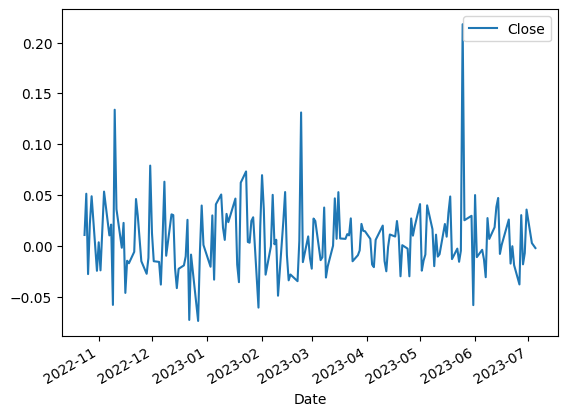

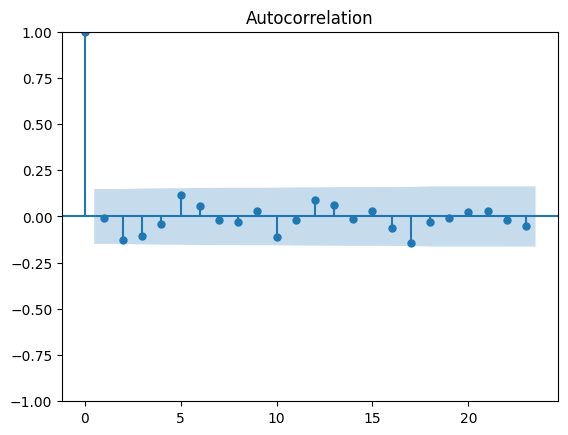

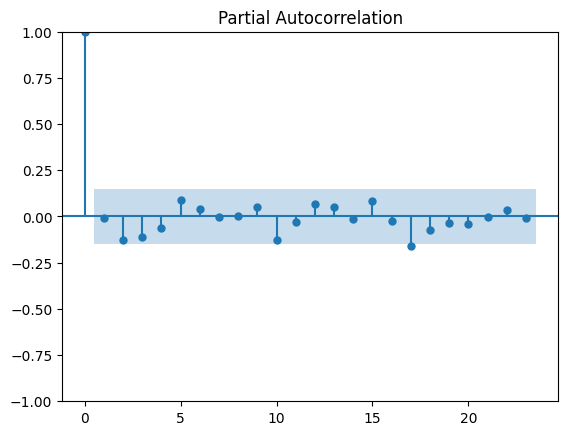

In [ ]:
# transform nonstationary time series to stationary: differencing
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

# plot acf graph
acf_original = plot_acf(df_train_diff)

# plot pacf graph
pacf_original = plot_pacf(df_train_diff)

In [ ]:
# conduct adf test again
adf_test = adfuller(df_train_diff)

adf_test[1] # if p-value > 0.05, then time series is nonstationary

8.403473602361225e-19

In [ ]:
# fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(0, 1, 0))
model_fit = model.fit()

model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  175
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 330.045
Date:                Sat, 21 Oct 2023   AIC                           -658.091
Time:                        16:38:09   BIC                           -654.932
Sample:                             0   HQIC                          -656.809
                                - 175                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0013   6.41e-05     20.575      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               437.89
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.56
Prob(H) (two-sided):                  0.93   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

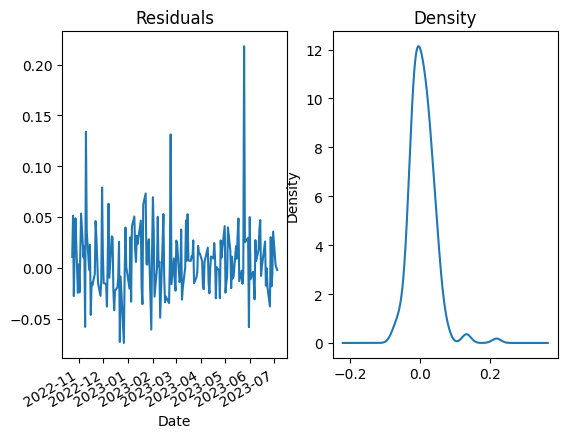

In [ ]:
# check residuals
import matplotlib.pyplot as plt

residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

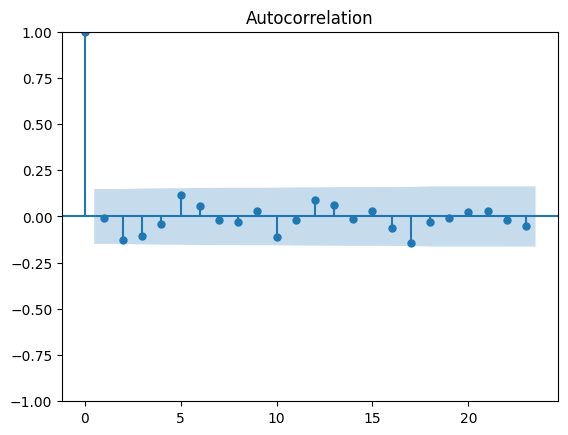

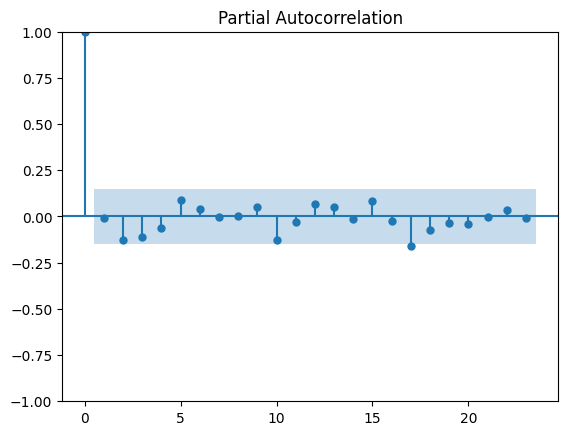

In [ ]:
# plot acf and pacf of residuals

# plot acf graph
acf_original = plot_acf(df_train_diff)

# plot pacf graph
pacf_original = plot_pacf(df_train_diff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

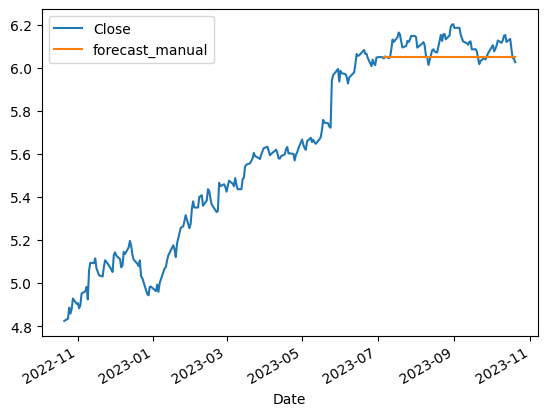

In [ ]:
# generate predictions (manual)
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None] * len(df_train) + list(forecast_test)

df.plot()

In [ ]:
# automatic ARIMA model fitting
!pip install pmdarima
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

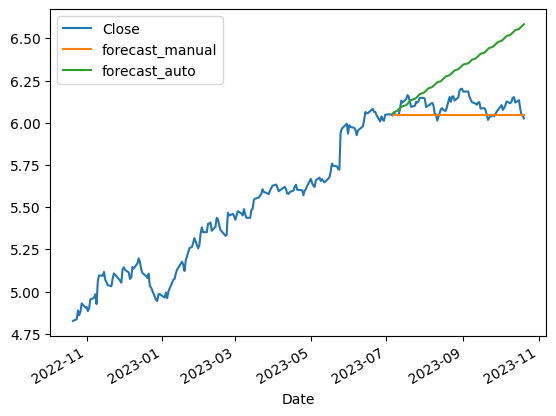

In [ ]:
# generate predictions (auto)
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))

df['forecast_auto'] = [None] * len(df_train) + list(forecast_test_auto)

df.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_manual = mean_absolute_error(df_test, forecast_test)
rmse_manual = np.sqrt(mean_squared_error(df_test, forecast_test))
mae_auto = mean_absolute_error(df_test, forecast_test_auto)
rmse_auto = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae (manual): {mae_manual}')
print(f'rmse (manual): {rmse_manual}')
print(f'mae (auto): {mae_auto}')
print(f'rmse (auto): {rmse_auto}')

mae (manual): 0.060116308431858834
rmse (manual): 0.07220235833091472
mae (auto): 0.22072116016696525
rmse (auto): 0.27192699260501413
